In [ ]:
# The figures in the paper use processed data (In this repository) that was checked and output using the 10x Genomics's Loupe browser. 
# Here we reproduce the data processing process there.

In [1]:
import scanpy as sc
import os
import sys
sys.path.append(os.pardir)

model_name = 'normal'
results_analysis_file = '../data/calculated/preprocessing/{}_analysis.h5ad'.format(model_name)
seed = 0

# # if you need
import warnings
warnings.filterwarnings('ignore')

In [2]:
# based on base.ipyenb
adata_analysis = sc.read(results_analysis_file)

In [3]:
# louvain 8 is Bulge (CD34)
# lovain 18 is Melanocytes(Dct)


adata_analysis.obs['batch_bulge'] = adata_analysis.obs['batch'].copy()
adata_analysis.obs['batch_melanocytes'] = adata_analysis.obs['batch'].copy()


adata_analysis.obs['batch_bulge'] = adata_analysis.obs['batch_bulge'].cat.add_categories('100')
adata_analysis.obs['batch_melanocytes'] = adata_analysis.obs['batch_melanocytes'].cat.add_categories('200')

adata_analysis.obs.loc[adata_analysis.obs['louvain'] != '8', 'batch_bulge'] = '100'
adata_analysis.obs.loc[adata_analysis.obs['louvain'] != '18', 'batch_melanocytes'] = '200'

In [4]:
y_o = adata_analysis.obs.groupby('y_o')
print(y_o.size())

y_o
old      34017
young    27770
dtype: int64


In [5]:
adata_analysis_young = adata_analysis[adata_analysis.obs['y_o'] != 'old']
adata_analysis_old = adata_analysis[adata_analysis.obs['y_o'] != 'young']

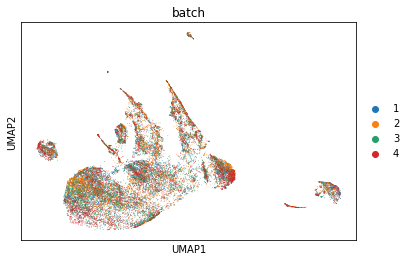

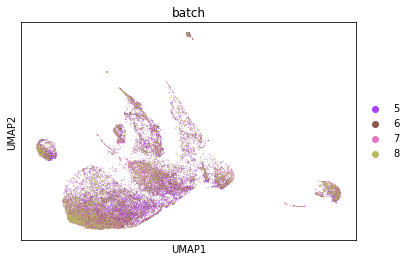

In [6]:
sc.pl.umap(adata_analysis_young, color=['batch'], components = ['1,2'], ncols=1, size=2)
sc.pl.umap(adata_analysis_old, color=['batch'], components = ['1,2'], ncols=1, size=2)

Trying to set attribute `._uns` of view, copying.


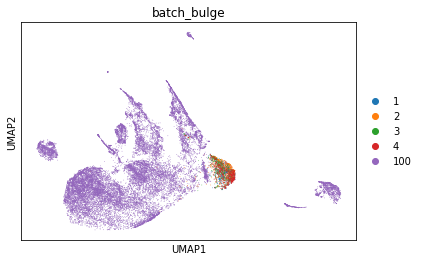

Trying to set attribute `._uns` of view, copying.


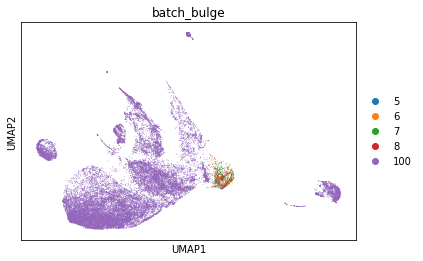

In [7]:
sc.pl.umap(adata_analysis_young, color=['batch_bulge'], components = ['1,2'], ncols=1, size=2)
sc.pl.umap(adata_analysis_old, color=['batch_bulge'], components = ['1,2'], ncols=1, size=2)

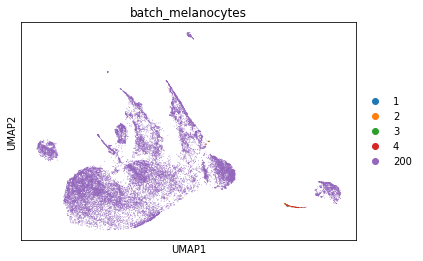

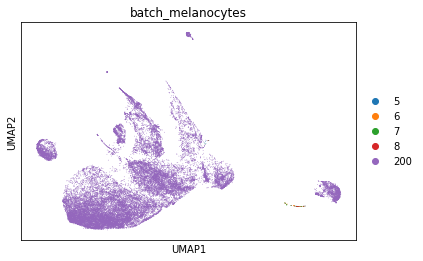

In [8]:
sc.pl.umap(adata_analysis_young, color=['batch_melanocytes'], components = ['1,2'], ncols=1, size=2)
sc.pl.umap(adata_analysis_old, color=['batch_melanocytes'], components = ['1,2'], ncols=1, size=2)